In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv("data/Caravan.csv").assign(Purchase=lambda df_: np.where(df_["Purchase"] == "Yes", 1, 0))

In [3]:
X = df.drop("Purchase", axis="columns")
y = df["Purchase"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [ ]:
models = [
    # ("dummy", DummyClassifier()),
    # ("balanced logistic", make_pipeline(StandardScaler(), LogisticRegression(class_weight="balanced"))),
    ("logistic", make_pipeline(StandardScaler(), LogisticRegression())),
    # ("balanced tree", DecisionTreeClassifier(class_weight="balanced")),
    # ("tree", DecisionTreeClassifier()),
    ("balanced forest", RandomForestClassifier(n_estimators=1000, class_weight="balanced")),
    # ("forest", RandomForestClassifier(n_estimators=1000)),
    # ("balanced extratrees", ExtraTreesClassifier(class_weight="balanced")),
    # ("extratrees", ExtraTreesClassifier()),
    # ("balanced nb", MultinomialNB(class_prior=[.5, .5])),
    ("nb", MultinomialNB()),
    ]

logistic
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1369
           1       0.33      0.02      0.04        87

    accuracy                           0.94      1456
   macro avg       0.64      0.51      0.51      1456
weighted avg       0.91      0.94      0.91      1456


tree
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      1369
           1       0.16      0.17      0.16        87

    accuracy                           0.89      1456
   macro avg       0.55      0.56      0.55      1456
weighted avg       0.90      0.89      0.90      1456


balanced forest
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1369
           1       0.24      0.09      0.13        87

    accuracy                           0.93      1456
   macro avg       0.59      0.54      0.55      1456
weighted avg       0.90      0.93      0.9

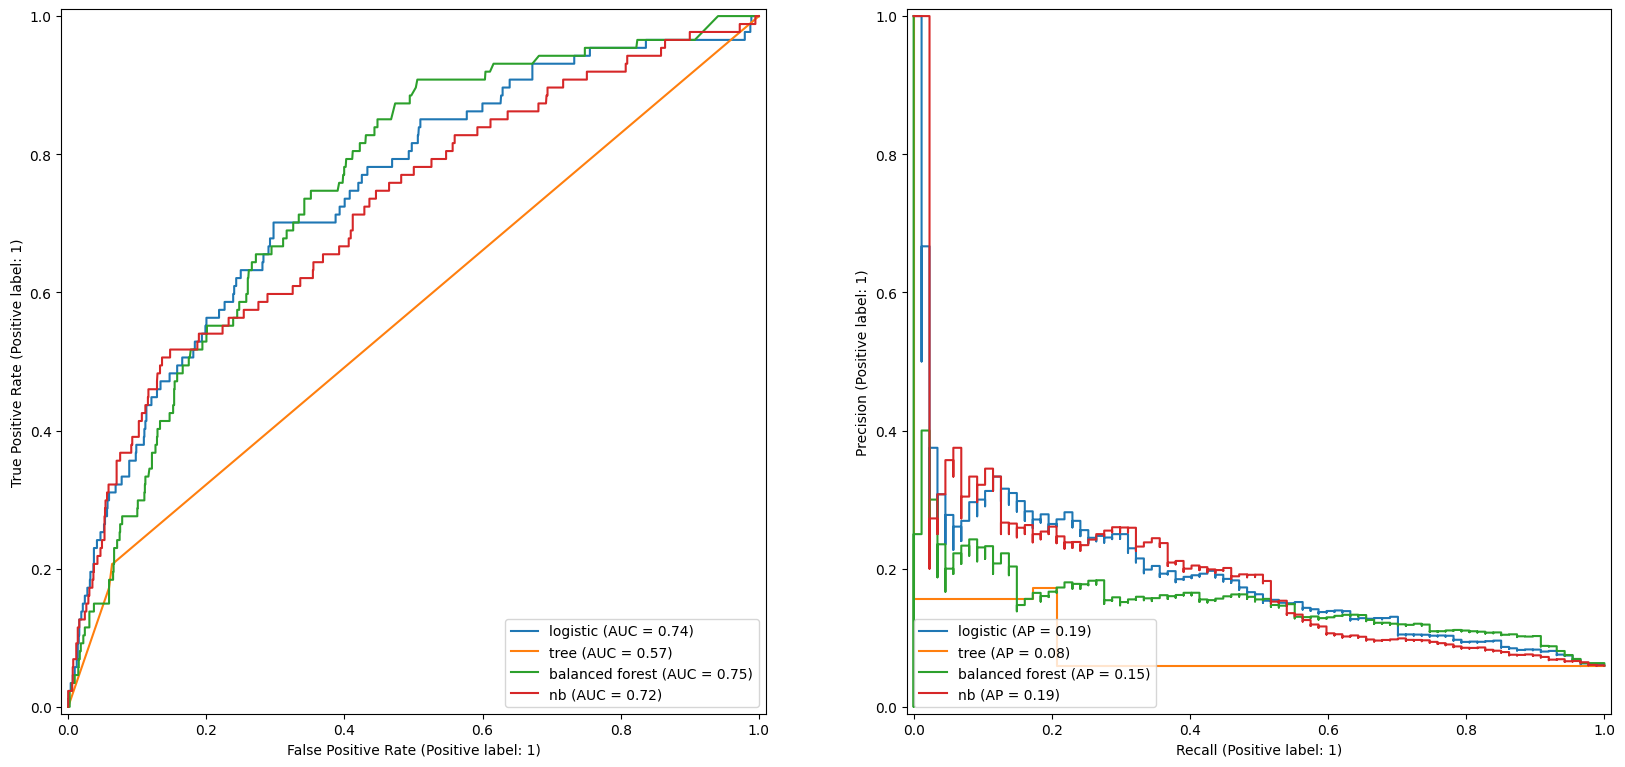

In [8]:
_, axs = plt.subplots(1, 2, figsize=(20, 10))

for name, model in models:

    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)

    RocCurveDisplay.from_estimator(model, X_test, y=y_test, ax=axs[0], name=name)
    PrecisionRecallDisplay.from_estimator(model, X_test, y=y_test, ax=axs[1], name=name)
    
    print(name)
    print(classification_report(y_true=y_test, y_pred=y_test_pred))
    print()

plt.show()